In [1]:
import sys, os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.signal
import importlib
import h5py

In [2]:

#path="/Users/ajc/FUSE/simulations/barrow_icewedges/hydrologic_connection/ProjectionsF"
path = "/Users/ajc/Core/simulations/barrow_icewedges/hydrologic_connection/ProjectionsP/"
var_set = ['surface_flux-day.dat','vertical_slice_rim-mass_flux100cm.dat']

outfile='/Users/ajc/Documents/MyPapers/TroughHydrodynamics/figures/Feb16_uniform_om/'

In [3]:
#Simulations = [['CESM_C1','CESM_C1A','CESM_C1B'],['CESM_C2'], ['CESM_C3', 'CESM_C3A', 'CESM_C3B', 'CESM_C3C']]
#Simulations = [['CESM_C10','CESM_C11'], ['CESM_C20', 'CESM_C21','CESM_C22'],['CESM_C30', 'CESM_C31']] #variable peat thickness runs
#Simulations = [['CESM_C10','CESM_C11'], ['CESM_C20', 'CESM_C21'],['CESM_C30', 'CESM_C31']] #variable peat thickness runs

Simulations = [['CESM_C10','CESM_C11'], ['CESM_C20', 'CESM_C21'], ['CESM_C30','CESM_C31','CESM_C32','CESM_C33'] ]# modified rain model
Simulations = [['CESM_C10A'], ['CESM_C20A','CESM_C21A'],['CESM_C30A','CESM_C31A'] ]

#Dec 15, 2020
Simulations = [['CESM_C20','CESM_C21','CESM_C22'], ['CESM_C10B','CESM_C11B','CESM_C12B','CESM_C13B'],['CESM_C30','CESM_C31','CESM_C32','CESM_C33','CESM_C34'] ]# modified rain model, dessicated zone =0.1, longwaves


#Dec 22, 2020: ProjectionsO
Simulations = [['CESM_C2%s'%i for i in range(3)], ['CESM_C1%s'%i for i in range(4)],['CESM_C3%s'%i for i in range(3)] ]# modified rain model, dessicated zone =0.1, longwaves

# Feb 16
Simulations = [['CESM_C2%s'%i for i in range(3)], ['CESM_C1%s'%i for i in range(4)],['CESM_C3%sX'%i for i in range(3)] ]# modified rain model, dessicated zone =0.1, longwaves

Simulations = [['CESM_C21']]

In [4]:
def read_file(file):
    d = np.loadtxt(file,usecols=1,skiprows=6)
    t1 = np.loadtxt(file,usecols=0,skiprows=6)
    t = np.array([x/86400./365. for x in t1])
    #print (len(d),len(t))
    l = np.minimum(len(d),len(t))
    return d[:l],t[:l]

def read_set(set,var):
    dat = []
    tim = []
    for s in set:
        file = os.path.join(path,s, var)
       
        d = np.loadtxt(file,usecols=1,skiprows=6)
        t1 = np.loadtxt(file,usecols=0,skiprows=6)
        t = np.array([x/86400./365. for x in t1])
        
        L = len(d)%365
        if L >0:
            #print ('LL: ',L)
            d = d[:-L]
            t = t[:len(d)]
        t0 =0
        if (len(tim)==0):
            dat.append(d)
            tim.append(t)
        else:
            
            t0 = np.where(t <=tim[-1][-1])[0]
            
            if len(t0) >0:
                d = d[t0[-1]:]
                t = t[t0[-1]:]
                #print ('T0: ',s,t, tim[-1][-1],t0)
                #print (s, t[0],tim[-1][-1])
            dat.append(d)
            tim.append(t)
        

   
    dat = np.concatenate(dat)
    tim = np.concatenate(tim)
    L = len(dat)%365
    if L >0:
        dat = dat[:-L]
        tim = tim[:-L] 
    #print ('Lengths: ',L, len(dat)%365, len(tim)%365,len(dat), len(tim), len(dat))
    
    return dat, tim


2640.991912385103 0.2880809655150612 9167.533535800474


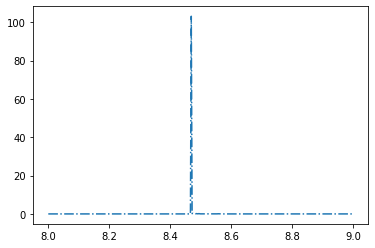

In [11]:
surface_area = 61.92
d1, t1 = read_set(Simulations[0],'surface_flux-day.dat')
d11 = [x/(55555*surface_area)*86400*365*1000 for x in d1] #converted to day here
d21 = np.reshape(d11,(-1,365)).mean(axis=1)
i = 2
plt.plot(t1[365*i:(i+1)*365], d1[365*i:(i+1)*365],'-.')
#plt.plot(d21,"-*")
#print (t1[365*i:(i+1)*365][171])
#print (d1[365*i:(i+1)*365][171])
factor = 86400*365*1000./(55555.*surface_area)
x1 = np.mean(d1[365*i:(i+1)*365])

print (x1* factor, x1, factor)

In [ ]:
colors = ['r','k','g','m','c','y']
marks = ['.','*', '+', 'o']
marks = ['-','-','-']
Labels = [r'S$_{1}$', r'S$_{2}$', r'S$_{3}$']

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(6,6), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
    
plt.tight_layout()
axs = axs.ravel()
dry_year = 22
wet_year = 91
avg_year = [27,44,76]
Y = [wet_year,dry_year,avg_year[1]]
Colors = ['k','b','r','g']


for j in range(3):
    s = 365*Y[j]
    e = 365*(Y[j]+1)
    for i,sim in enumerate(Simulations):
        var = var_set[0]
        d1, t1 = read_set(sim,var)
        d1 = [x/55555.*1e6 for x in d1]
        #print (sim)
        axs[j].plot(d1[s:e],color=Colors[i],label=Labels[i])
        axs[j].legend()
        axs[j].set_xlim(110,320)
      
        if (j==0 and i ==2):
            d2a = np.reshape(d1,(-1,365))
            dx1 = []
            dx2 = []
            for x in d2a:
                dx1.append(np.mean(x[np.where(x>=0)]))
                dx2.append(np.mean(x[np.where(x<0)]))
            #print (len(d2a), d2a.shape)
            print (len(dx1))
            #d22 = d2a[np.where(d2a>=0)]
            #d222 = d2a[np.where(d2a<0)]
            
            d2 = np.reshape(d1,(-1,365)).mean(axis=1)
            t2 = np.reshape(t1,(-1,365)).mean(axis=1)

            #axs[3].plot(t2,d2,marks[i],color=Colors[i],label=Labels[i])
            
            t2 = np.reshape(t1,(-1,365)).mean(axis=1)
            axs[3].plot(dx1,marks[i],color=Colors[i],label=Labels[i])
            axs[3].plot(dx2,marks[i],color=Colors[i+1],label=Labels[i])
            #axs[3].set_ylim(-15,50)
# Net flux (inward + outward) decreases, why? decreased outward or increased inward?

In [ ]:
forcing_watershed_FM = h5py.File("/Users/ajc/Core/PreProcessing/ats-intermediate-ngee/data/SNAP/CESM-RCP8.5-2006-2100_dm1985-2015-ET.h5",'r')

d1 = forcing_watershed_FM['precipitation rain [m s^-1]'][:] + 0*forcing_watershed_FM['precipitation snow [m SWE s^-1]'][:] 
#d2 = np.reshape(d1,(-1,365)).mean(axis=1)*86400*365*1000
drain = [-x*86400*1000*365 for x in d1]
d1 = forcing_watershed_FM['time [s]']
d3_time = [t/86400/365. for t in d1]
#print (d3_time[0])
forcing_watershed_FM.close()
print (np.mean(drain[:365]))

In [ ]:
#print (len(d3),max(d3))

In [ ]:
%matplotlib qt

fig, axs = plt.subplots(2,3, figsize=(7,5), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1,1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
    
plt.tight_layout()
axs = axs.ravel()
dry_year = 22
wet_year = 91
avg_year = [27,44,76]
Y = [wet_year,dry_year,avg_year[1]]
Colors = ['g','k','r','b']
fig_lab = ['a', 'b', 'c']
Year = ['Wet year', 'Dry year', 'Average year']

for j in range(3):
    s = 365*Y[j]
    e = 365*(Y[j]+1)
    for i,sim in enumerate(Simulations):
        var = var_set[0]
        d1, t1 = read_set(sim,var)
        d1 = np.array([x/55555.*1e6 for x in d1])
        
        k = np.where(d1[s:e]>0)[0]
        k = k[0] if len(k) >0 else 0
        
        axs[j].plot(d1[s:e],color=Colors[i],label=Labels[i])
        #axs[j].legend()
        axs[j].set_xlim(k-5,k+13)
        axs[j].set_xticks(np.arange(k-5,k+13.1,6))
        axs[j].set_ylim(-10,30)
        axs[j].set_yticks(np.arange(-10,30.1,10))
        
        axs[3+j].plot(d1[s:e],linestyle='-',color=Colors[i],label=Labels[i])
        #axs[3+j].legend()
        axs[3+j].set_xlim(k+13,300)
        axs[3+j].set_xticks(np.arange(k+13,300.1,50))
        axs[3+j].set_ylim(-15,10)
        axs[3+j].set_yticks(np.arange(-15,10.1,5))
        axs[3+j].set_xlabel('Day of year',fontsize=12, fontweight='normal')
        if (i==0):
            axs[i].set_ylabel('Flux [cm$^3$/sec]',fontsize=12, fontweight='normal')
            axs[3+i].set_ylabel('Flux [cm$^3$/sec]',fontsize=12, fontweight='normal')
        if j ==0:
            axs[i].set_title('%s'%Year[i],fontsize=12, fontweight='normal')
            
        ax1 = axs[3+j].twinx()
        ax1.plot(drain[s:e],'b',linestyle='-')
        ax1.set_ylim([-60, 0.05])
        lb = np.linspace(60,0,4,dtype='int')
        ax1.set_yticklabels(lb)
        
plt.tight_layout()
#plt.savefig(outfile+'discharge-1.pdf',bbox_inches='tight', dpi=500)
# Net flux (inward + outward) decreases, why? decreased outward or increased inward?
#red: S3
#blue: S2
#black: S1

In [ ]:
%matplotlib qt
#outfile='/Users/ajc/Documents/MyPapers/TroughBC/figures/'
fig, axs = plt.subplots(3,1, figsize=(6,7), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
    
plt.tight_layout()
axs = axs.ravel()
dry_year = 22
wet_year = 91
avg_year = [27,44,76]
Y = [wet_year,dry_year,avg_year[1]]
Colors = ['g','k','r','b']

Year = ['Wet year', 'Dry year', 'Average year']
Labels = ['no-flow', 'free-flow', 'hybrid-flow']
marks = ['solid', 'solid','solid']
#drain = [x for x in drain]

for j in range(3):
    s = 365*Y[j]
    e = 365*(Y[j]+1)
    #print (s,e)
    for i,sim in enumerate(Simulations):
        #if j ==0 and i ==-1: #this is becasue S2 scenario has one extra year, 68 ran twice, restarted from one previous year
        #    s = 365*(Y[j]+1)
        #    e = 365*(Y[j]+2)
        #print (s,e,Colors[i])
        var = var_set[0]
        d1, t1 = read_set(sim,var)
        d1 = np.array([x/55555.*1e6 for x in d1])
        
        k = np.where(d1[s:e]>0)[0]
        k = k[0] if len(k) >0 else 0
        
        axs[j].plot(t1[s:e],d1[s:e],linestyle=marks[i],color=Colors[i],label=Labels[i])
        if i == 2:

            xx = np.where(d1[s:e] == np.max(d1[s:e]))
            print (xx, t1[s:e][xx]*365)
        
        
        #axs[j].set_xlim(100,300)
        #axs[j].set_xticks(np.arange(100,300.1,50))
        axs[j].set_ylim(-20,20)
        axs[j].set_yticks(np.arange(-20,20.1,10))
        axs[2].set_xlabel('Day of year',fontsize=12, fontweight='normal')
        
        axs[i].set_ylabel('Flux [cm$^3$/sec]',fontsize=12, fontweight='normal')
        if (j==1):
            axs[j].set_ylim(-20,20)
            axs[j].set_yticks(np.arange(-20,20.1,10))
        if j ==-1:
            axs[i].set_title('%s'%Year[i],fontsize=12, fontweight='normal')
        
        ax1 = axs[j].twinx()
        ax1.plot(d3_time[s:e],drain[s:e],'b',linestyle='-')
        ax1.set_ylim([-60, 0])
        lb = np.linspace(60,0,7,dtype='int')
        ax1.set_yticklabels(lb)
        ax1.set_ylabel('Precipiration rain [mm]',color='b')
        axs[j].text(101,-18,'(%s) %s'%(fig_lab[j],Year[j]))
        

axs[2].legend(loc='lower right',labelspacing=.1)

plt.tight_layout()
#plt.savefig(outfile+'discharge-1.pdf',bbox_inches='tight', dpi=500)
# Net flux (inward + outward) decreases, why? decreased outward or increased inward?
#red: S3
#blue: S2
#black: S1

In [ ]:
(103285 -101325)/ (1000*9.8) 

In [ ]:

%matplotlib qt
def Annual_avg_Q():
    
    fig, axs = plt.subplots(1,1, figsize=(6,3.5), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
    fig.subplots_adjust(hspace =.02, wspace=1.02)

    plt.tight_layout()
    #axs = axs.ravel()
    Colors = ['k','b','r','r']
    Labels = ['specified head (h=20cm)', 'seepage face', 'dynamic head']
    marks = ['solid', 'solid','solid']

    area = 61.92
    for i,sim in enumerate(Simulations):
        var = var_set[0]
        d1, t1 = read_set(sim,var)
        xx = np.where (d1 == np.max(d1))

        #d1 = np.array([x/(55555.*area)*86400*1000*365 for x in d1])
        d1 = np.array([x/55555.*1e+6 for x in d1])
        d1 = np.reshape(d1,(-1,365)).mean(axis=1)
        t1 = np.reshape(t1,(-1,365)).mean(axis=1)
        
        axs.plot(t1,d1,linestyle=marks[i],color=Colors[i],label=Labels[i])
        
        
        #axs.plot(2005 + t1, d2,linestyle=marks[i],color=Colors[i],label=Labels[i])

        #axs.set_xlim(100,300)
        #axs.set_xticks(np.arange(100,300.1,50))
        #axs.set_ylim(-20,20)
        #axs.set_yticks(np.arange(-20,20.1,10))
        #axs.set_xlabel('Day of year',fontsize=12, fontweight='normal')

        axs.set_ylabel('Net annual flux [cm$^3$/s]',fontsize=12, fontweight='normal')
        


    axs.legend(loc='upper right',labelspacing=.1)

    plt.tight_layout()
    #plt.savefig(outfile+'net-annual-discharge.pdf',bbox_inches='tight', dpi=500)
    #plt.savefig(outfile+'annual-discharge.pdf',bbox_inches='tight', dpi=500)
# Net flux (inward + outward) decreases, why? decreased outward or increased inward?

In [ ]:
Annual_avg_Q()

In [ ]:
def get_moving_average(d, m=5):
    d_avg = []
    len1 = len(d)
    for i in range(len1):
        if i < m:
            s1 = np.mean(d[:i+1])
        else:
            s1= np.mean(d[i-m:i])

        d_avg.append(s1)
    return d_avg

In [ ]:
%matplotlib qt
to_day_year = 86400 *365
Colors = ['b','k','r','r']
Labels = ['zero head','specified head','dynamic head']
#Labels = ['no-flow', 'free-flow', 'hybrid-flow']

from matplotlib import gridspec
def get_Discharge():
    fig, axss = plt.subplots(2,1, figsize=(6,3.5), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
    fig.subplots_adjust(hspace =.02, wspace=1.02)
    gs = gridspec.GridSpec(3, 1)#, width_ratios=[1]) 
    plt.tight_layout()
    
    time = 2006 + np.linspace(0,94,94,dtype='int')
    axs = plt.subplot(gs[1:])
    for i,sim in enumerate(Simulations):
        d1, t1 = read_set(sim,'surface_flux-day.dat')
        d11 = [x/(55555*surface_area)*to_day_year*1000 for x in d1] #converted to day here
        #t2 = [t*86400*365 for t in t1]
        time = 0*2006 + np.reshape(t1,(-1,365)).mean(axis=1)
        print (t1[:2],time[:2])
        if (i==2):
            d12 = np.reshape(d11,(-1,365))
            d21 = []
            d22 = []
            for d in d12:
                #print (len(d))
                #break
                dx = np.where(d>=0)
                dy = np.where(d<0)
                sum1 = np.sum(d[dx])/len(d)
                sum2 = np.sum(d[dy])/len(d)
                d21.append(sum1)
                d22.append(sum2)
            d21 = get_moving_average(d21)
            d22 = get_moving_average(d22)
            #Discharge[Labels[i]] = d21
            #Recharge[Labels[i]] = d22
            axs.plot(time, d21,color=Colors[2],label=Labels[2])
            axs.plot(time, d22,color=Colors[2])
        else:
            d2 = np.reshape(d11,(-1,365)).mean(axis=1)#*365
            xx = np.reshape(d11,(-1,365))
            #print (xx[2], len(xx[2]), d2[2])
            #t2 = np.reshape(t1,(-1,365)).mean(axis=1)
            ##d2 = get_moving_average(d2)
            #Discharge[Labels[i]] = d2
        
            #axs.plot(time, d2,color=Colors[i],label=Labels[i])
            axs.plot(time, d2,'*',label=Labels[i])
        
        
        ##axs.set_xlim((2006.5, 2100))
        #axs.set_ylim((-300,300))
        axs.set_xlabel('Year',fontsize=12, fontweight='normal')
        
        #axs.set_ylabel(r'Water content [m$^3$ $\cdot$ m$^{-1}$]',fontsize=12, fontweight='normal')
        axs.set_ylabel('Mean annual Q [mm]',fontsize=12, fontweight='normal')
        axs.legend(loc='lower left',labelspacing=.1)
        axs.axhline(y=0,linestyle='dashed',color='b')
        
        ax1 = plt.subplot(gs[0])#axs.twinx()
        force_time = np.reshape(d3_time,(-1,365)).mean(axis=1)
        force_rain = -np.reshape(drain,(-1,365)).mean(axis=1)
        ax1.plot(2006+force_time,force_rain,'grey',linestyle='-')
        
        ax1.set_ylim([1, 300])
        ax1.xaxis.set_visible(False)
        ax1.set_xlim((2006.5, 2100))
        gs.update(wspace=0.025, hspace=0.05)
        
        ax1.set_ylabel('Rain [mm]',fontsize=12,color='k')
            
        f = np.polyfit(force_time,force_rain,1)
        p = np.poly1d(f)
        ax1.plot(2006+force_time,p(force_time),color='k',linestyle='dashed')
    #plt.savefig(outfile+'annual-avg-discharge.pdf', bbox_inches='tight', dpi=500)
    #return Discharge,Recharge

In [ ]:
get_Discharge()